<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition

For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,8)

pd.set_option('display.max_columns', 100)

from scipy import stats
from scipy.stats import probplot

# Data Gathering

In [2]:
df = pd.read_csv("car_dataset.csv")
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

# Data Preparation

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [6]:
df.corr()

Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


**Dealing with Fuel_Type**

In [7]:
pd.get_dummies(df.Fuel_Type)

CNG  Diesel  Petrol
0      0       0       1
1      0       1       0
2      0       0       1
3      0       0       1
4      0       1       0
..   ...     ...     ...
296    0       1       0
297    0       0       1
298    0       0       1
299    0       1       0
300    0       0       1

[301 rows x 3 columns]

In [8]:
pd.DataFrame(pd.get_dummies(df.Fuel_Type))

CNG  Diesel  Petrol
0      0       0       1
1      0       1       0
2      0       0       1
3      0       0       1
4      0       1       0
..   ...     ...     ...
296    0       1       0
297    0       0       1
298    0       0       1
299    0       1       0
300    0       0       1

[301 rows x 3 columns]

In [9]:
df = pd.concat([df, pd.get_dummies(df.Fuel_Type)], axis=1)

In [10]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  CNG  Diesel  Petrol  
0      Dealer       Manual      0    0       0       1  
1      Dealer       Manual      0    0       1       0  
2      Dealer       Manual      0    0       0       1  
3      Dealer       Manual      0    0       0       1  
4      Dealer       Manual      0    0       1       0

In [11]:
df.drop("Fuel_Type", axis=1, inplace=True)

In [12]:
df.head(2)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Seller_Type  \
0     ritz  2014           3.35           5.59       27000      Dealer   
1      sx4  2013           4.75           9.54       43000      Dealer   

  Transmission  Owner  CNG  Diesel  Petrol  
0       Manual      0    0       0       1  
1       Manual      0    0       1       0

**Dealing with Transmission**

In [13]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
df.Transmission = df.Transmission.map(lambda x: 0 if x=="Automatic" else 1)

In [15]:
df.head(2)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Seller_Type  \
0     ritz  2014           3.35           5.59       27000      Dealer   
1      sx4  2013           4.75           9.54       43000      Dealer   

   Transmission  Owner  CNG  Diesel  Petrol  
0             1      0    0       0       1  
1             1      0    0       1       0

In [16]:
df.Transmission.unique()

array([1, 0], dtype=int64)

**Dealing with Seller_Type**

In [17]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [18]:
df.Seller_Type = df.Seller_Type.map(lambda x: 0 if x=="Dealer" else 1)

In [19]:
df.head(2)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Seller_Type  \
0     ritz  2014           3.35           5.59       27000            0   
1      sx4  2013           4.75           9.54       43000            0   

   Transmission  Owner  CNG  Diesel  Petrol  
0             1      0    0       0       1  
1             1      0    0       1       0

In [20]:
df.Seller_Type.unique()

array([0, 1], dtype=int64)

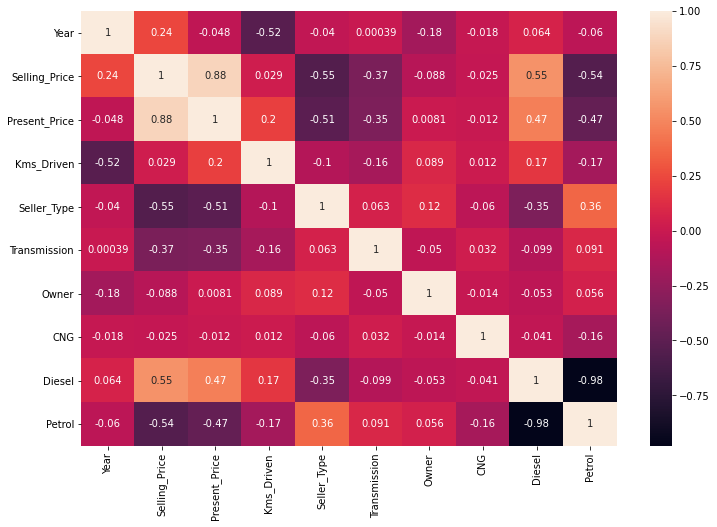

In [21]:
sns.heatmap(data=df.corr(), annot=True);

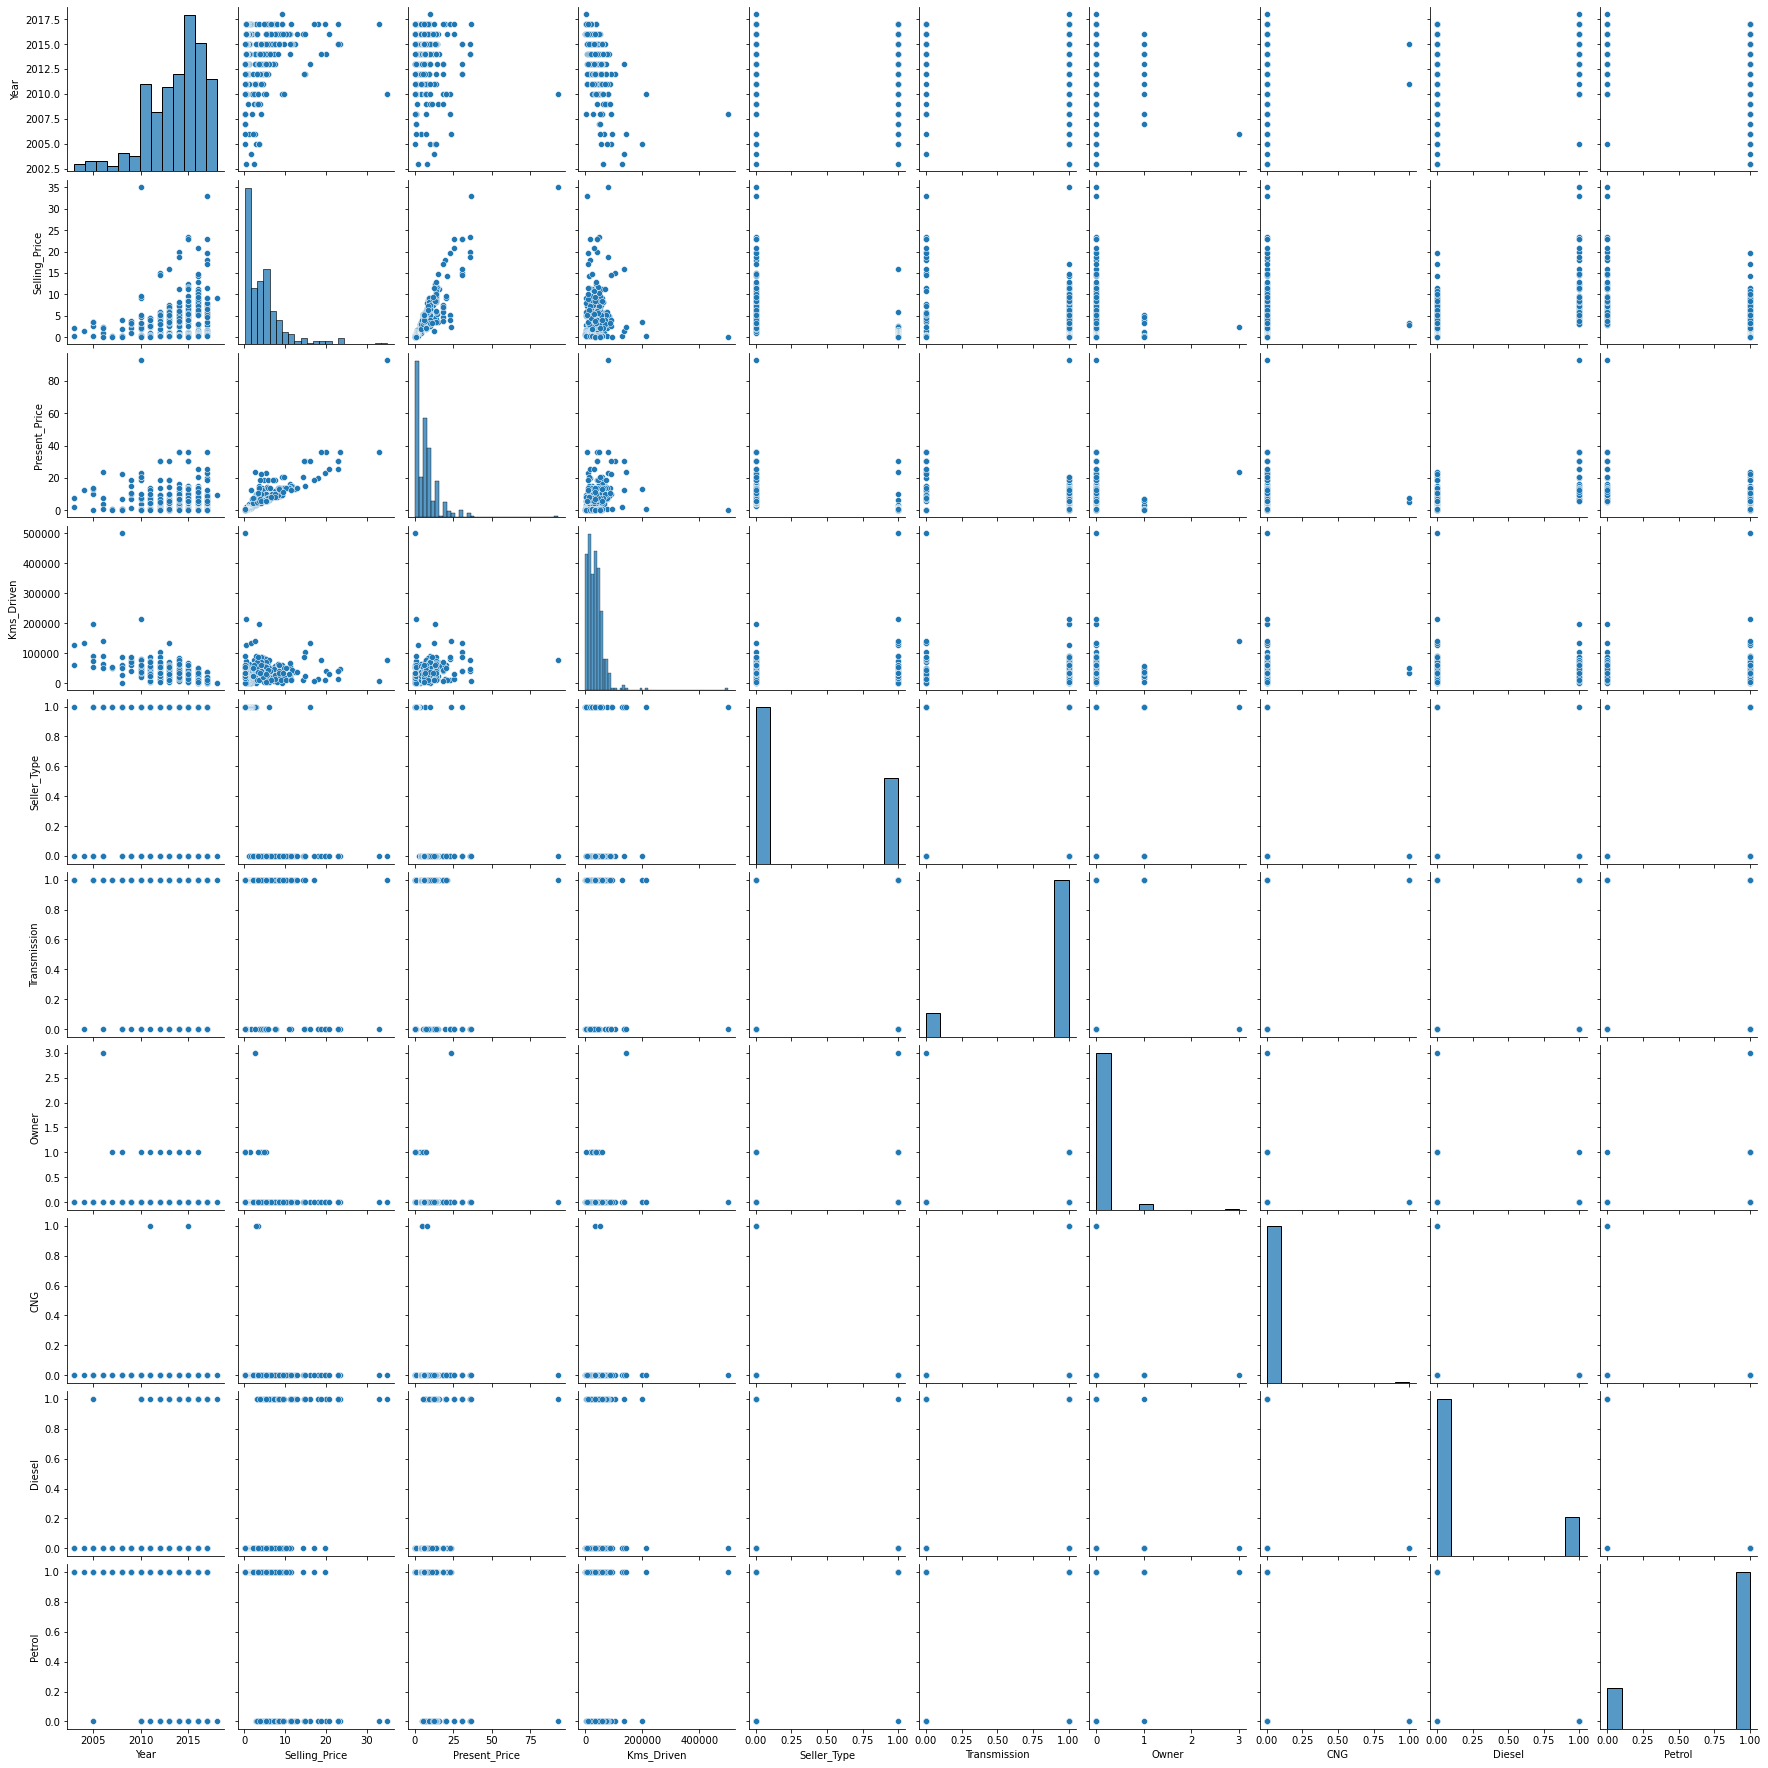

In [22]:
sns.pairplot(df);

### Features and target variable

In [23]:
df.sample(3)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
157  Yamaha FZ S V 2.0  2015           0.48           0.84       23000   
129  Yamaha FZ S V 2.0  2017           0.78           0.84        5000   
23            alto k10  2014           2.50           3.46       45280   

     Seller_Type  Transmission  Owner  CNG  Diesel  Petrol  
157            1             1      0    0       0       1  
129            1             1      0    0       0       1  
23             0             1      0    0       0       1

In [24]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [25]:
df.Car_Name.nunique()

98

Since I do not see a connection between car name and selling price I decided to drop it.

In [26]:
df = df.drop("Car_Name", axis=1)

In [27]:
X = df.drop("Selling_Price", axis=True)

In [28]:
y = df.Selling_Price

# Regularization

### Polynomial Conversion

In [29]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [30]:
poly_features.shape

(301, 219)

In [1]:
df.shape()

NameError: name 'df' is not defined

### Splitting data into training and testing

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [33]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (210, 219)
Train target shape   :  (210,)
Test features shape  :  (91, 219)
Test target shape    :  (91,)


# Scaling Data

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()  # with StandardScaler, we standardized our features

In [35]:
scaler.fit(X_train)

StandardScaler()

In [36]:
X_train = scaler.transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
mean -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      14   15   16   17   18   19   20   21   22   23   24   25   26   27   \
mean  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      28   29   30   31   32   33   34   35   36   37   38   39   40   41   \
mean  0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

      42   43   44   45   46   47   48   49   ...  169  170  171  172  173  \
mean  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  ... -0.0 -0.0  0.0  0.0 -0.0   
std   1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  ...  1.0  1.0  0.0  0.0  1.0   

      174  175  176  177  178  179  180  181  182  183  184  185  186  187  \
mean  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0   
std   1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

      188  189  190  191  192  193  194  195  196  197  198  199  200  201  \
mean  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0   

      202  203  204  205  206  207  208  209  210  211  212  213  214  215  \
mean -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   

      216  217  218  
mean  0.0  0.0 -0.0  
std   0.0  0.0  1.0  

[2 rows x 219 columns]

In [39]:
pd.DataFrame(X_test).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
mean -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      14   15   16   17   18   19   20   21   22   23   24   25   26   27   \
mean -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0   
std   1.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   

      28   29   30   31   32   33   34   35   36   37   38   39   40   41   \
mean -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0   
std   1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   

      42   43   44   45   46   47   48   49   ...  169  170  171  172  173  \
mean  0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
std   1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0  0.0  1.0   

      174  175  176  177  178  179  180  181  182  183  184  185  186  187  \
mean -0.0  0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0   
std   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0   

      188  189  190  191  192  193  194  195  196  197  198  199  200  201  \
mean -0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0   
std   1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

      202  203  204  205  206  207  208  209  210  211  212  213  214  215  \
mean -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

      216  217  218  
mean  0.0  0.0 -0.0  
std   0.0  0.0  1.0  

[2 rows x 219 columns]

##  Model Building (Linear Regression)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()

In [42]:
# We have just trained the model by fitting!!!!
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = lm.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [45]:
y_train_pred = lm.predict(X_train)

In [46]:
eval_metrics(y_train, y_train_pred)

# We may have overfitting here! Since, it is kinda momental screen shot, we need to confirm it with CV.

Model testing performance:
--------------------------
R2_score 	: 0.9910624201548235
MAE 		: 0.31342924147422563
MSE 		: 0.21935177048243376
RMSE 		: 0.46835005122497186


In [47]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: -2.4455290070734244e+18
MAE 		: 1235814784.5204809
MSE 		: 6.963448347073687e+19
RMSE 		: 8344727884.762742


In [48]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

lm_train       lm_test
rmse  0.468350  8.344728e+09
mae   0.313429  1.235815e+09
mse   0.219352  6.963448e+19
R2    0.991062 -2.445529e+18

# Multicollineraity

In [49]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [50]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

# it is seen that we have some multicollineraity.

**Let's apply CROSS VALIDATE**

In [51]:
# from sklearn.metrics import SCORERS
# list(SCORERS.keys())

In [52]:
from sklearn.model_selection import cross_validate, cross_val_score

In [53]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [54]:
pd.DataFrame(scores, index = range(1, 11))

fit_time  score_time       test_r2  test_neg_mean_absolute_error  \
1   0.009980    0.002000 -3.649104e+04                 -1.541951e+02   
2   0.009994    0.002999 -3.839513e+24                 -3.510853e+12   
3   0.010895    0.002998 -2.184541e+00                 -1.929607e+00   
4   0.009994    0.003998 -2.820952e+24                 -2.531630e+12   
5   0.007995    0.003012  9.507548e-01                 -3.751346e-01   
6   0.008995    0.001999  9.206406e-01                 -7.246674e-01   
7   0.010994    0.001998  7.590414e-01                 -1.313654e+00   
8   0.009995    0.005997 -6.464072e+23                 -9.590351e+11   
9   0.012994    0.001997 -3.814551e+24                 -3.613085e+12   
10  0.020988    0.001999 -1.298611e+21                 -2.665150e+10   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                 -4.805430e+05                     -6.932121e+02  
2                 -2.588479e+26                     -1.608875e+13  
3                 -3.998282e+01                     -6.323197e+00  
4                 -7.069784e+25                     -8.408201e+12  
5                 -2.533302e-01                     -5.033192e-01  
6                 -1.356952e+00                     -1.164883e+00  
7                 -1.152120e+01                     -3.394289e+00  
8                 -1.095851e+25                     -3.310364e+12  
9                 -9.138673e+25                     -9.559641e+12  
10                -1.285504e+22                     -1.133801e+11

In [55]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                            -1.112272e+24
test_neg_mean_absolute_error       -1.064125e+12
test_neg_mean_squared_error        -4.319038e+25
test_neg_root_mean_squared_error   -3.748034e+12
dtype: float64

In [56]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: -2.4455290070734244e+18
MAE 		: 1235814784.5204809
MSE 		: 6.963448347073687e+19
RMSE 		: 8344727884.762742


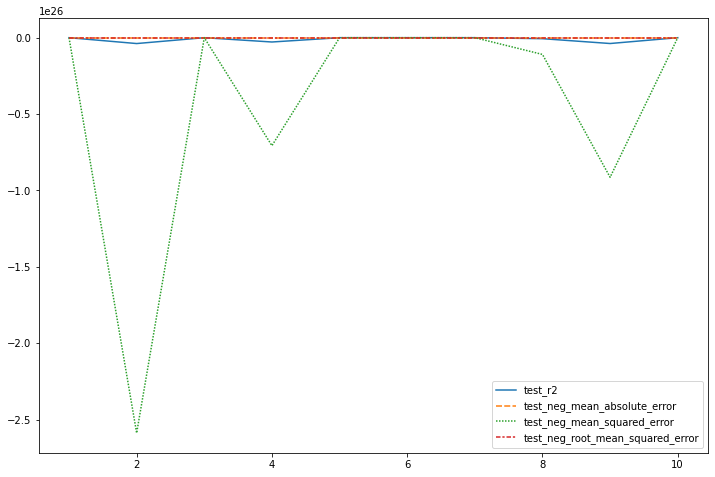

In [57]:
sns.lineplot(data = scores.iloc[:,2:]);

In [58]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0    8.148836e+09
1   -7.065577e+12
2    1.863054e+13
3   -5.891181e+12
4   -1.535356e+13
..            ...
214  0.000000e+00
215 -7.169848e+11
216  0.000000e+00
217  0.000000e+00
218  2.498869e+11

[219 rows x 1 columns]

# Interpret the model

# Model Evaluation

In [59]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

Actual          pred      residual
177    0.35 -4.851180e+00  5.201180e+00
289   10.11  1.010194e+01  8.055346e-03
228    4.95  4.711320e+00  2.386803e-01
198    0.15  5.879943e+10 -5.879943e+10
60     6.95  7.152726e+00 -2.027259e-01
9      7.45  6.539445e+00  9.105553e-01
118    1.10  9.945228e-01  1.054772e-01
154    0.50  5.443275e-01 -4.432747e-02
164    0.45  3.773353e-01  7.266472e-02
33     6.00  6.805070e+00 -8.050697e-01
5      9.25  9.578507e+00 -3.285072e-01
116    1.10  7.396400e-01  3.603600e-01
45     7.50  1.077773e+01 -3.277726e+00
173    0.40 -2.183678e-01  6.183678e-01
230    6.15  5.625382e+00  5.246178e-01
46     2.65  2.838273e+00 -1.882728e-01
124    0.95  8.460853e-01  1.039147e-01
97    17.00  1.503359e+01  1.966415e+00
158    0.48  3.958900e-01  8.411003e-02
101    1.70  1.620499e+00  7.950066e-02

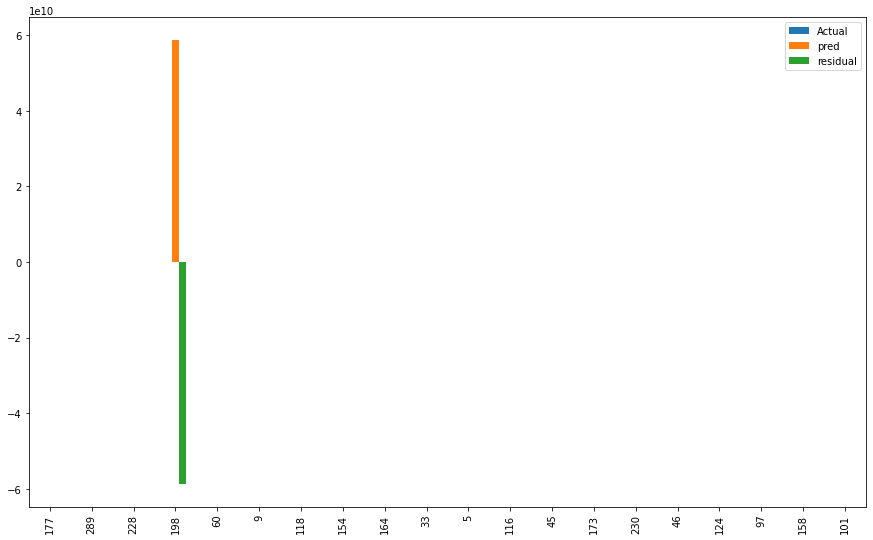

In [60]:
compare.head(20).plot(kind='bar',figsize=(15,9));

# Ridge

In [61]:
from sklearn.linear_model import RidgeCV

In [62]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [63]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [64]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [65]:
ridge_cv_model.alpha_

1.0

In [66]:
y_pred = ridge_cv_model.predict(X_test)

In [67]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9358280570769026
MAE 		: 0.822232573458615
MSE 		: 1.8272447743774918
RMSE 		: 1.3517561815569743


In [68]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.9756676627355862
MAE 		: 0.5235483080505653
MSE 		: 0.5971797009237716
RMSE 		: 0.7727740296644108


In [69]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

ridge_cv_train  ridge_cv_test
rmse        0.772774       1.351756
mae         0.523548       0.822233
mse         0.597180       1.827245
R2          0.975668       0.935828

In [70]:
pd.concat([ls, rcs], axis = 1)

lm_train       lm_test  ridge_cv_train  ridge_cv_test
rmse  0.468350  8.344728e+09        0.772774       1.351756
mae   0.313429  1.235815e+09        0.523548       0.822233
mse   0.219352  6.963448e+19        0.597180       1.827245
R2    0.991062 -2.445529e+18        0.975668       0.935828

# Lasso

In [71]:
from sklearn.linear_model import Lasso, LassoCV

In [72]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [73]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [74]:
lasso_cv_model.alpha_

0.01

In [75]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9741668208113604
MAE 		: 0.5430595890100802
MSE 		: 0.6340143182358468
RMSE 		: 0.7962501605876426


In [76]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9501006039954503
MAE 		: 0.766997147661278
MSE 		: 1.4208454106364412
RMSE 		: 1.1919922024226675


In [77]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

lasso_cv_train  lasso_cv_test
rmse        0.796250       1.191992
mae         0.543060       0.766997
mse         0.634014       1.420845
R2          0.974167       0.950101

In [78]:
pd.concat([ls, rcs, lcs], axis = 1)

lm_train       lm_test  ridge_cv_train  ridge_cv_test  lasso_cv_train  \
rmse  0.468350  8.344728e+09        0.772774       1.351756        0.796250   
mae   0.313429  1.235815e+09        0.523548       0.822233        0.543060   
mse   0.219352  6.963448e+19        0.597180       1.827245        0.634014   
R2    0.991062 -2.445529e+18        0.975668       0.935828        0.974167   

      lasso_cv_test  
rmse       1.191992  
mae        0.766997  
mse        1.420845  
R2         0.950101

## Elastic-Net 

In [79]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [80]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [81]:
elastic_model.l1_ratio

0.5

In [82]:
elastic_model.alpha

1.0

In [83]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.831391627848403
MAE 		: 1.3040571029372083
MSE 		: 4.138093934855733
RMSE 		: 2.034230551057508


In [84]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7716806395134471
MAE 		: 1.5873412347113927
MSE 		: 6.501211266709269
RMSE 		: 2.5497472946763313


In [85]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

elastic_train  elastic_test
rmse       2.034231      2.549747
mae        1.304057      1.587341
mse        4.138094      6.501211
R2         0.831392      0.771681

In [86]:
pd.concat([ls, rcs, lcs, es], axis = 1)

lm_train       lm_test  ridge_cv_train  ridge_cv_test  lasso_cv_train  \
rmse  0.468350  8.344728e+09        0.772774       1.351756        0.796250   
mae   0.313429  1.235815e+09        0.523548       0.822233        0.543060   
mse   0.219352  6.963448e+19        0.597180       1.827245        0.634014   
R2    0.991062 -2.445529e+18        0.975668       0.935828        0.974167   

      lasso_cv_test  elastic_train  elastic_test  
rmse       1.191992       2.034231      2.549747  
mae        0.766997       1.304057      1.587341  
mse        1.420845       4.138094      6.501211  
R2         0.950101       0.831392      0.771681

In [87]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [88]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [89]:
elastic_cv_model.alpha_

0.01

In [90]:
elastic_cv_model.l1_ratio_

0.7

In [91]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.973738788478017
MAE 		: 0.5462892047780386
MSE 		: 0.6445193600669741
RMSE 		: 0.8028196310921738


In [92]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.944383236706189
MAE 		: 0.8021793396913783
MSE 		: 1.5836428736183426
RMSE 		: 1.258428732037831


In [93]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

elastic_cv_train  elastic_cv_test
rmse          0.802820         1.258429
mae           0.546289         0.802179
mse           0.644519         1.583643
R2            0.973739         0.944383

In [94]:
pd.concat([ls, rcs, lcs, ecs], axis = 1)

lm_train       lm_test  ridge_cv_train  ridge_cv_test  lasso_cv_train  \
rmse  0.468350  8.344728e+09        0.772774       1.351756        0.796250   
mae   0.313429  1.235815e+09        0.523548       0.822233        0.543060   
mse   0.219352  6.963448e+19        0.597180       1.827245        0.634014   
R2    0.991062 -2.445529e+18        0.975668       0.935828        0.974167   

      lasso_cv_test  elastic_cv_train  elastic_cv_test  
rmse       1.191992          0.802820         1.258429  
mae        0.766997          0.546289         0.802179  
mse        1.420845          0.644519         1.583643  
R2         0.950101          0.973739         0.944383